In [1]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fin=pd.read_csv('train_Finland.csv')
fin

,Unnamed: 0,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,OECD,...,PV4RTML,PV5RTML,PV6RTML,PV7RTML,PV8RTML,PV9RTML,PV10RTML,SENWT,VER_DAT,test
0,220156,246.0,FIN,24600002.0,24600150.0,07MS,24600,FIN0003,2460000,1.0,...,262.150,246.025,294.466,314.160,305.324,323.110,336.388,0.79770,21MAY19:11:35:21,NaN
1,220157,246.0,FIN,24600002.0,24600869.0,07MS,24600,FIN0003,2460000,1.0,...,631.603,600.546,590.567,661.742,621.359,606.775,667.593,0.79770,21MAY19:11:35:21,NaN
2,220158,246.0,FIN,24600002.0,24601660.0,07MS,24600,FIN0003,2460000,1.0,...,429.344,445.866,432.196,444.903,430.402,436.098,401.891,0.79770,21MAY19:11:35:21,NaN
3,220159,246.0,FIN,24600002.0,24601972.0,07MS,24600,FIN0003,2460000,1.0,...,529.213,504.989,444.354,513.862,457.579,534.796,516.346,0.79770,21MAY19:11:35:21,NaN
4,220160,246.0,FIN,24600002.0,24602514.0,07MS,24600,FIN0003,2460000,1.0,...,574.807,569.511,536.798,562.645,581.569,546.920,679.291,0.93542,21MAY19:11:35:21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5644,225800,246.0,FIN,24600205.0,24608210.0,07MS,24600,FIN0011,2460000,1.0,...,395.448,487.672,369.969,397.322,359.979,424.439,416.069,0.99690,21MAY19:11:35:22,NaN
5645,225801,246.0,FIN,24600209.0,24603224.0,07MS,24600,FIN0011,2460000,1.0,...,390.021,413.717,418.164,428.800,437.253,430.532,457.073,0.97579,21MAY19:11:35:22,NaN
5646,225802,246.0,FIN,24600209.0,24606966.0,07MS,24600,FIN0011,2460000,1.0,...,346.849,375.733,294.325,377.135,362.897,316.928,326.541,0.97579,21MAY19:11:35:22,NaN
5647,225803,246.0,FIN,24600209.0,24607345.0,07MS,24600,FIN0011,2460000,1.0,...,447.392,447.703,495.702,483.255,390.814,448.072,428.337,0.97579,21MAY19:11:35:22,NaN


In [4]:
escs_name=["HISEI","PARED","HOMEPOS"]
escs=fin[escs_name]
escs

,HISEI,PARED,HOMEPOS
0,21.82,12.0,-0.6614
1,72.83,16.5,0.4723
2,24.98,12.0,-0.3049
3,25.95,14.5,-0.1414
4,68.55,16.5,-0.5370
...,...,...,...
5644,75.13,12.0,0.0483
5645,78.69,12.0,-0.8026
5646,25.95,14.5,-0.0685
5647,26.64,14.5,-1.0627


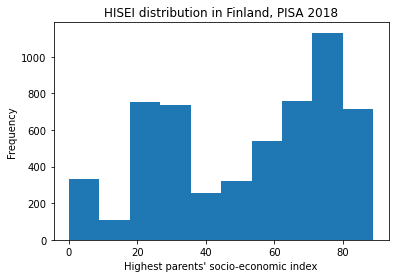

In [26]:
plt.hist(escs['HISEI'])
plt.xlabel("Highest parents' socio-economic index")
plt.ylabel("Frequency")
plt.title("HISEI distribution in Finland, PISA 2018")
plt.savefig('HISEI Finland.jpg')
plt.show()

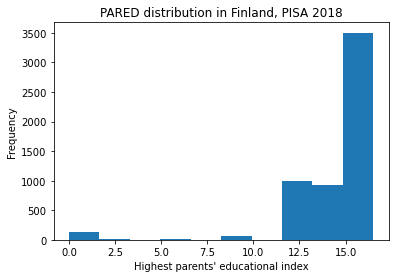

In [27]:
plt.hist(escs['PARED'])
plt.xlabel("Highest parents' educational index")
plt.ylabel("Frequency")
plt.title("PARED distribution in Finland, PISA 2018")
plt.savefig('par Finland.jpg')
plt.show()

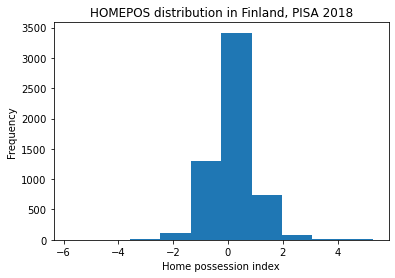

In [28]:
plt.hist(escs['HOMEPOS'])
plt.xlabel("Home possession index")
plt.ylabel("Frequency")
plt.title("HOMEPOS distribution in Finland, PISA 2018")
plt.savefig('home Finland.jpg')
plt.show()

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix

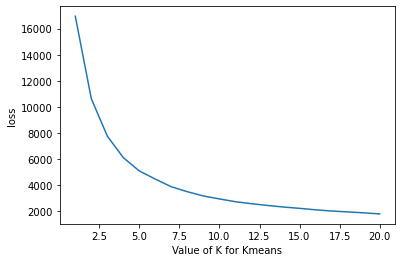

In [15]:
escs=escs.fillna(0)
X = escs.values.tolist()
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3)
summary_3d = pca.fit_transform(X_scaled)

#figure with normalization
k_range = range(1, 21)
loss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled) 
    loss.append(kmeans.inertia_)
    
plt.plot(k_range, loss)    
plt.xlabel('Value of K for Kmeans')
plt.ylabel('loss')
plt.show()

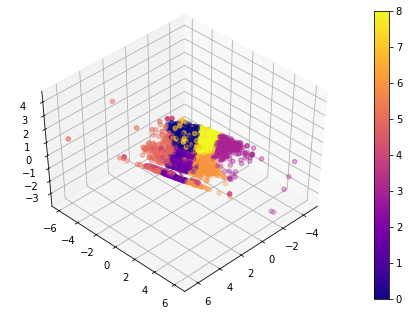

In [16]:
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns


kmeans = KMeans(n_clusters = 9)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)


In [17]:
escs['cluster'] = clusters

In [19]:
escs['cluster'] = escs['cluster'].replace([4,1,2,5,6,7,0,8,3],[0,1,2,3,4,5,6,7,8])

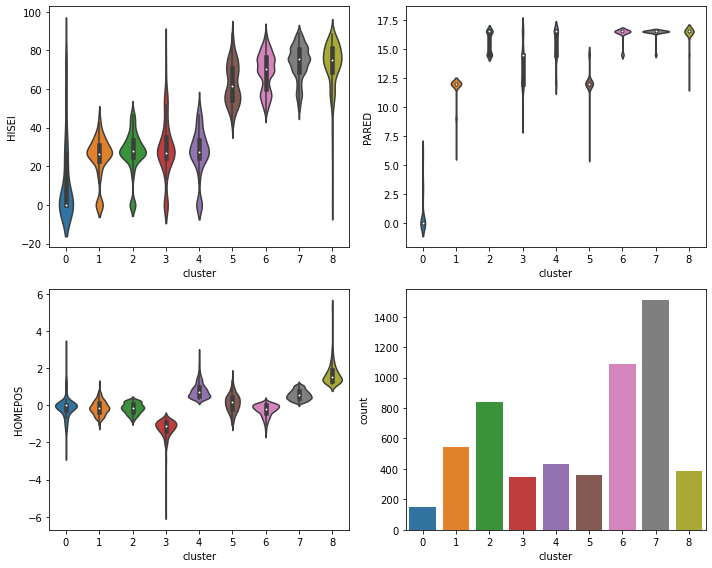

In [20]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()

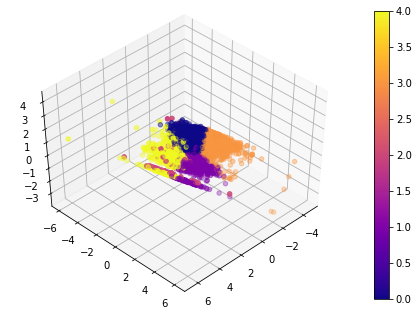

In [21]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

fig = plt.figure()
ax = Axes3D(fig)
g = ax.scatter(summary_3d[:,0], summary_3d[:,1], summary_3d[:,2], c = clusters, cmap = 'plasma')
plt.colorbar(g, ax = ax)
ax.view_init(azim = 45, elev = 45)

In [22]:
escs['cluster'] = clusters

In [24]:
escs['cluster'] = escs['cluster'].replace([2,1,4,0,3],[0,1,2,3,4])

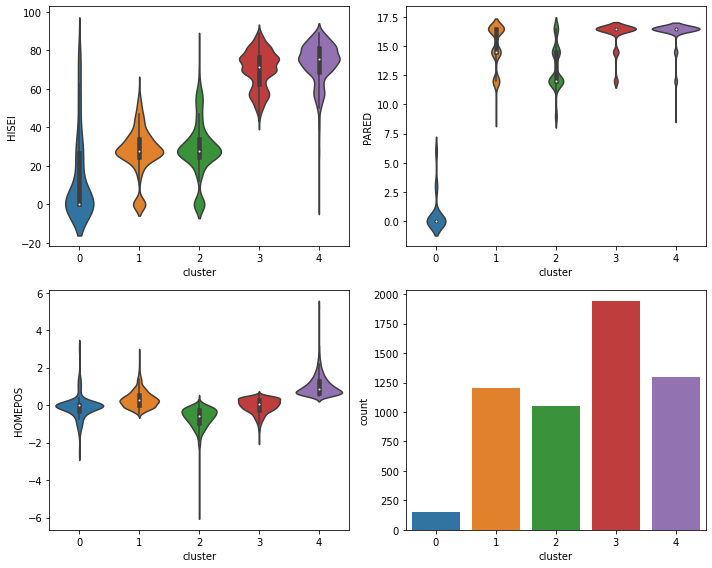

In [25]:
fig, axes = plt.subplots(2,2, figsize = (10,8))

sns.violinplot(data = escs, x = 'cluster', y = 'HISEI', ax = axes[0][0])
sns.violinplot(data = escs, x = 'cluster', y = 'PARED', ax = axes[0][1])
sns.violinplot(data = escs, x = 'cluster', y = 'HOMEPOS', ax = axes[1][0])
sns.countplot(data = escs, x = 'cluster', ax = axes[1][1])

plt.tight_layout()